In [3]:
import pickle  
# load the data 
infile = open('../data/OLP_updated.pickle','rb')  
df = pickle.load(infile)  

# read edge lists for all networks
df_edgelists = df['edges_id'] # column 'edges_id' in dataframe df includes the edge list 
                              # for each network 
 
# extract the edge list for the first network 
edges_orig = df_edgelists.iloc[0] # a numpy array of edge list for original graph

In [9]:
df.columns

Index(['level_0', 'index', 'network_index', 'network_name', 'title',
       'description', 'networkDomain', 'subDomain', 'citation', 'sourceUrl',
       'hostedBy', 'graphProperties', 'nodeType', 'edgeType', 'nodes_id',
       'edges_id', 'number_nodes', 'number_edges', 'ave_degree', 'labels_Q',
       'labels_Q_MR', 'labels_Q_MP', 'labels_Q_GMP', 'labels_B_NR_SBM',
       'labels_B_NR_DCSBM', 'labels_B_HKK_SBM', 'labels_cICL_HKK_SBM',
       'labels_Infomap', 'labels_MDL_SBM', 'labels_MDL_DCSBM', 'labels_S_NB',
       'labels_S_cBHm', 'labels_S_cBHa', 'labels_AMOS',
       'labels_AMOS_reliablity', 'labels_LRT_WB_DCSBM', 'Q_score',
       'Q_MR_score', 'Q_MP_score', 'Q_GMP_score', 'B_NR_SBM_score',
       'B_NR_DCSBM_score', 'B_HKK_SBM_score', 'cICL_HKK_SBM_score',
       'Infomap_score', 'MDL_SBM_score', 'MDL_DCSBM_score', 'S_NB_score',
       'S_cBHm_score', 'S_cBHa_score', 'AMOS_score', 'LRT_WB_DCSBM_score'],
      dtype='object')

In [10]:
# Select the required columns
selected_columns = [
	'network_index', 'network_name', 'title', 'description',
	'networkDomain', 'subDomain', 'sourceUrl', 'number_nodes', 'number_edges'
]

# Create a new DataFrame with the selected columns
output_df = df[selected_columns]

# Define the output file path
output_file = '../data/ICON_info.csv'

# Save the DataFrame to a CSV file
output_df.to_csv(output_file, index=False)

print(f"Network information has been saved to {output_file}")


Network information has been saved to ../data/ICON_info.csv


In [33]:
import pickle

sample_network_index = [447, 133, 122, 80]

# Filter the DataFrame to include only the specified network indices
filtered_df = df[df['network_index'].isin(sample_network_index)]

# Define the output file path
output_file = '../data/OLP_updated_sample.pickle'

# Save the filtered DataFrame to a pickle file
with open(output_file, 'wb') as f:
	pickle.dump(filtered_df, f)

print(f"Filtered networks have been saved to {output_file}")

Filtered networks have been saved to ../data/OLP_updated_sample.pickle


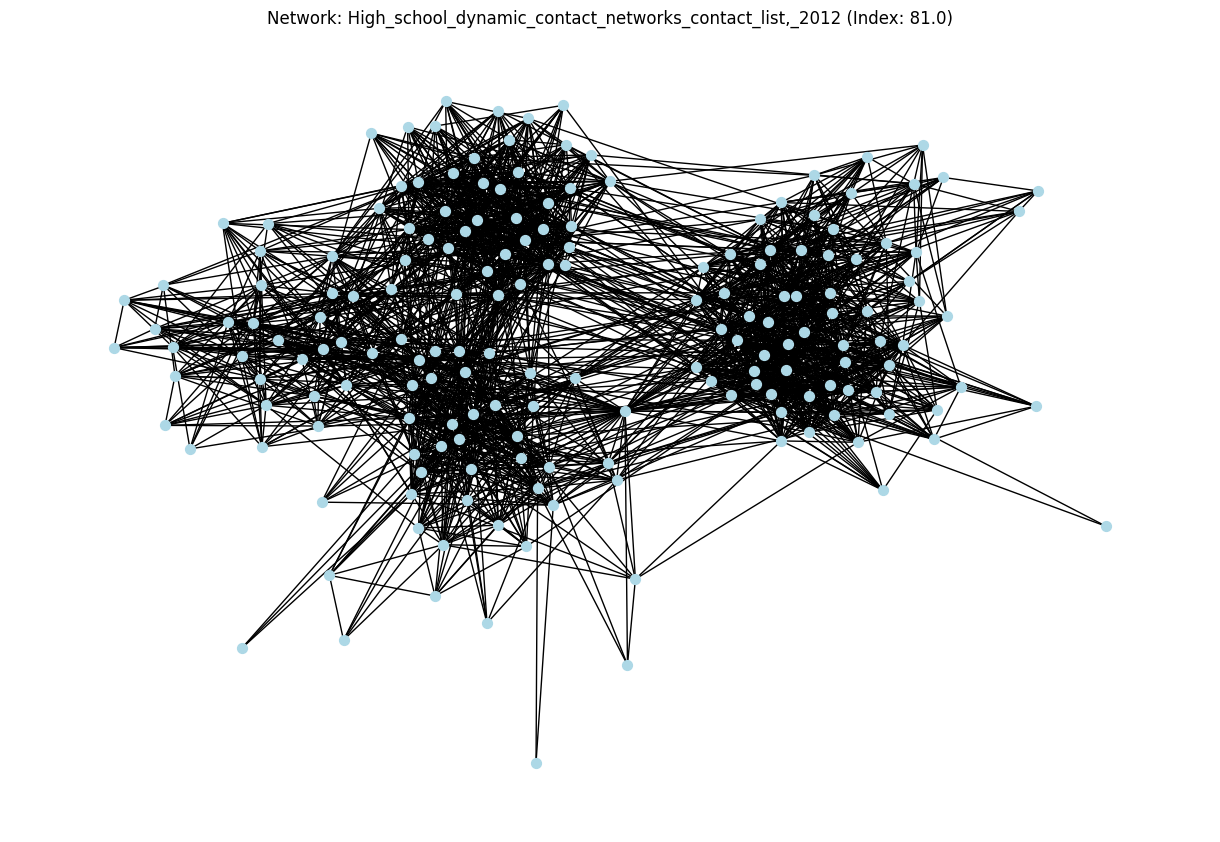

Number of nodes: 180
Number of edges: 2220


In [32]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_network(G, title):
	"""
	Plot a NetworkX graph.

	Args:
		G (nx.Graph): The NetworkX graph to plot.
		title (str): The title of the plot.
	"""
	plt.figure(figsize=(12, 8))
	pos = nx.spring_layout(G)
	nx.draw(G, pos, node_color='lightblue', node_size=50, with_labels=False)
	plt.title(title)
	plt.axis('off')
	plt.show()

# Get the first network from filtered_df
first_network = filtered_df.iloc[0]
network_index = first_network['network_index']
network_name = first_network['network_name']

# Create a NetworkX graph from the edges
G = nx.Graph()
edges = first_network['edges_id']  # Edges are stored as 2-D arrays
G.add_edges_from(edges)

# Plot the network
plot_network(G, f"Network: {network_name} (Index: {network_index})")

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

